In [1]:
# Copyright (c) 2023 Orange

# Permission is hereby granted, free of charge, to any person obtaining a copy of this software
# and associated documentation files (the "Software"), to deal in the Software without restriction,
# including without limitation the rights to use, copy, modify, merge, publish, distribute,
# sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is
# furnished to do so, subject to the following conditions:

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING
# BUT NOT LIMITEDTOTHE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
# NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM,
# DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
# OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
#
# Software Name : knowledge-graph-dst
# Version: 1.0.0
# SPDX-FileCopyrightText: Copyright (c) 2023 Orange
# SPDX-License-Identifier: MIT
# This software is distributed under the MIT,
# the text of which is available at https://opensource.org/licenses/MIT
# or see the "LICENSE" file for more details.
# Author: H. Andres Gonzalez
#!pip install bertviz torch transformers ecco
# ecco is broken as hell tho
from transformers import T5ForConditionalGeneration, AutoTokenizer, LongT5ForConditionalGeneration, AutoModelForSeq2SeqLM

/data/userstorage/yddb9991/visualizing-dst/old_snake/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Ecco viz

https://github.com/jalammar/ecco

https://jalammar.github.io/explaining-transformers/

https://colab.research.google.com/github/jalammar/ecco/blob/main/notebooks/readme.md%20examples.ipynb


In [15]:
!ls ../base-flant5-dst/torch_rdf/tb_logs/long-t5-local_base_experiment_1/version_0/checkpoints/best_dst_ckpt

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
version_0  version_1


In [5]:
import ecco

/data/userstorage/yddb9991/visualizing-dst/old_snake/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
long_local_window = '../base-flant5-dst/torch_rdf/tb_logs/long-t5-local_base_experiment_1/version_0/checkpoints/best_dst_ckpt'
long_tglobal_window = '../base-flant5-dst/torch_rdf/tb_logs/long-t5-tglobal_base_experiment_1/version_0/checkpoints/best_dst_ckpt'

# tokenizer = AutoTokenizer.from_pretrained(model_path)
# model = LongT5ForConditionalGeneration.from_pretrained(model_path)

In [17]:
# https://github.com/jalammar/ecco/blob/main/src/ecco/model-config.yaml SEE ACTUAL CONFIG
model_config = {
    'embedding': "shared.weight",
    'type': 'enc-dec',
    #'activations': ['intermediate\.dense'], #This is a regex model.encoder.layer[0].intermediate.dense
    #'activations': ['DenseReluDense\.wo'],  # model.encoder.block[0].layer[1].DenseReluDense.wo
    'activations': 'wo', 
    'token_prefix': '▁',
    'partial_token_prefix': ''  # it seems that it is ''? https://github.com/jalammar/ecco/blob/main/notebooks/Identifying%20model%20configuration.ipynb
}

In [18]:
ecco_model = ecco.from_pretrained(long_tglobal_window, 
                                  activations=True,
                                  model_config=model_config,
                                  verbose=False)  # WAS FALSE


OutOfMemoryError: CUDA out of memory. Tried to allocate 96.00 MiB (GPU 0; 23.70 GiB total capacity; 21.72 GiB already allocated; 12.56 MiB free; 22.70 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
SNG0535 = ["""
 USER I am looking for a particular restaurant. It's Efes Restaurant.
 SYSTEM I was able to find Efes Restaurant for you. This is a Turkish restaurant in
 the centre of town with a moderate price range. Would you like a booking?
 """,
 """
 USER I am looking for a particular restaurant. It's Efes Restaurant.
 SYSTEM I was able to find Efes Restaurant for you. This is a Turkish restaurant in the 
 centre of town with a moderate price range. Would you like a booking?USER Yes I would, for 3 people Wednesday
 at 18:15.
 SYSTEM Unfortunately, the restaurant is full at this time. Is there another time or day I can reserve for you?
 STATE booking type booking result food turkish result name efes restaurant result pricerange 
 moderate system offered booking search type restaurant result type restaurant search name efes restaurant
 result area centre
 """,
 """
 USER I am looking for a particular restaurant. It's Efes Restaurant.
 SYSTEM I was able to find Efes Restaurant for you. This is a Turkish restaurant in the centre of
 town with a moderate price range. Would you like a booking?
 USER Yes I would, for 3 people Wednesday at 18:15.
 SYSTEM Unfortunately, the restaurant is full at this time. Is there another time or day 
 I can reserve for you?
 USER Can you check for 17:15 on the same day?
 SYSTEM Sure, you're all set for 17:15 with reference number 6LZYPIFZ. The table will be reserved for 15 minutes.
 Would you like assistance with anything else? 
 STATE booking type booking search day wednesday booking duration? 
 system canthelp booking booking type booking result area centre result type restaurant system offered
 booking booking day? result food turkish search type restaurant search duration 1815 result pricerange 
 moderate search name efes restaurant search people 3 result name efes restaurant
 """,
 """
 USER I am looking for a particular restaurant. It's Efes Restaurant.
 SYSTEM I was able to find Efes Restaurant for you. This is a Turkish restaurant
 in the centre of town with a moderate price range. Would you like a booking?
 USER Yes I would, for 3 people Wednesday at 18:15.
 SYSTEM Unfortunately, the restaurant is full at this time. Is there another time or day I can reserve for you?
 USER Can you check for 17:15 on the same day?
 SYSTEM Sure, you're all set for 17:15 with reference number 6LZYPIFZ. The table will be reserved for 15 minutes.
 Would you like assistance with anything else?
 USER No, that's all I need today. I appreciate your help - goodbye!
 SYSTEM Thank you for using this system! 
 STATE booking type booking system offered booking result food turkish search people 3 
 system inquired user search name efes restaurant booking duration 1715 result name efes 
 restaurant booking type booking search day same day system canthelp booking result area 
 centre search type restaurant result type restaurant booking day? result pricerange moderate search
 duration 1715 booking ref 6lzypifz
 """]

In [23]:
text = SNG0535[1]
ecco_model
# FIX FOR REQUIREJS: https://github.com/jessevig/bertviz/blob/master/bertviz/head_view.js

In [25]:
output = ecco_model.generate(text, max_new_tokens=128, do_sample=True, generate=30, attribution=['ig'])

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 MiB (GPU 0; 23.70 GiB total capacity; 21.90 GiB already allocated; 2.56 MiB free; 22.70 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [21]:
output.position(92, attr_method='ig')

<IPython.core.display.Javascript object>

In [22]:
output.primary_attributions(attr_method='ig', ignore_tokens=[0,1,2,3,4,5,6,43,44], style='detailed')

<IPython.core.display.Javascript object>

In [8]:
output = ecco_model.generate(text, max_new_tokens=128, generate=30, do_sample=False, attribution=['ig'])
output.primary_attributions(attr_method='ig', ignore_tokens=[0,1,2,3,4,5,6,43,44])

<IPython.core.display.Javascript object>

ACTUAL NUMBER OF TOKENS GENERATED IF WE IGNORE SPECIAL IS 22


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
output.layer_predictions(position=65, layer=10, topk=5)

<IPython.core.display.Javascript object>

In [30]:
ecco_model.tokenizer("Turkish restaurant")
#ecco_model.tokenizer("Would you like a booking?")

{'input_ids': [15423, 2062, 1], 'attention_mask': [1, 1, 1]}

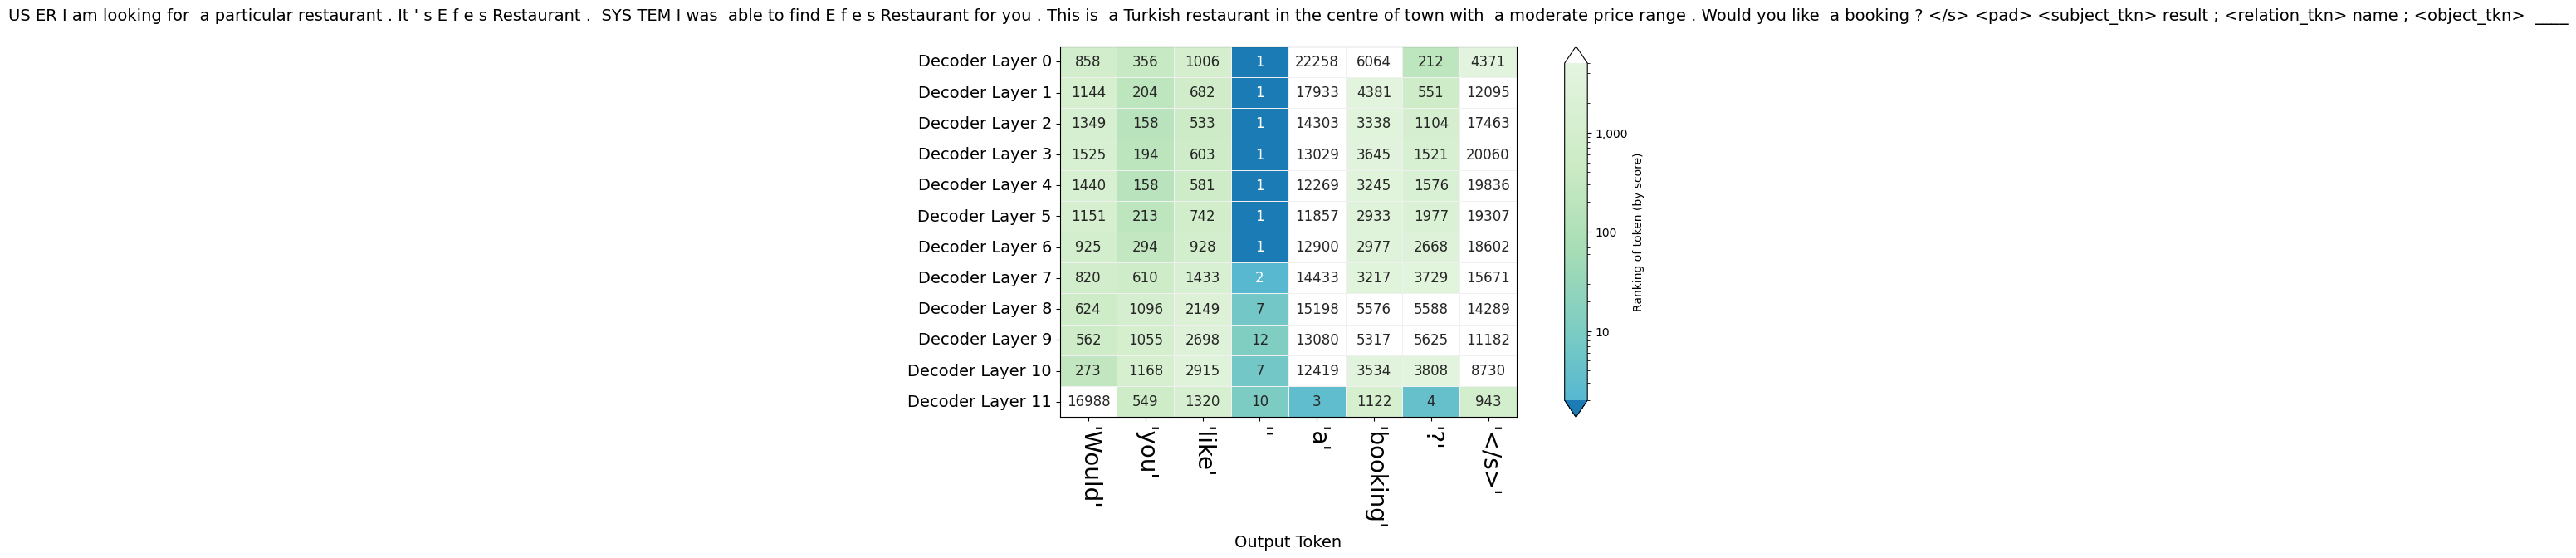

In [31]:
output.rankings_watch(watch=[5328, 25, 114, 3, 9, 5038, 58, 1], position=72, save_file_path='rank_watch_test')

In [32]:
output_1 = ecco_model.generate(text, max_new_tokens=128, generate=3, do_sample=False, attribution=['ig'])
#go back to true

<IPython.core.display.Javascript object>

/data/userstorage/yddb9991/visualizing-dst/old_snake/lib/python3.8/site-packages/transformers/modeling_utils.py:838: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


ACTUAL NUMBER OF TOKENS GENERATED IF WE IGNORE SPECIAL IS 2


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:

output_1.primary_attributions(attr_method='ig', ignore_tokens=[0,1,2,3,4,5,6,43,44])

<IPython.core.display.Javascript object>

/data/userstorage/yddb9991/visualizing-dst/old_snake/src/ecco/src/ecco/output.py:477: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  token_id = torch.tensor(self.token_ids[0][offset + j])


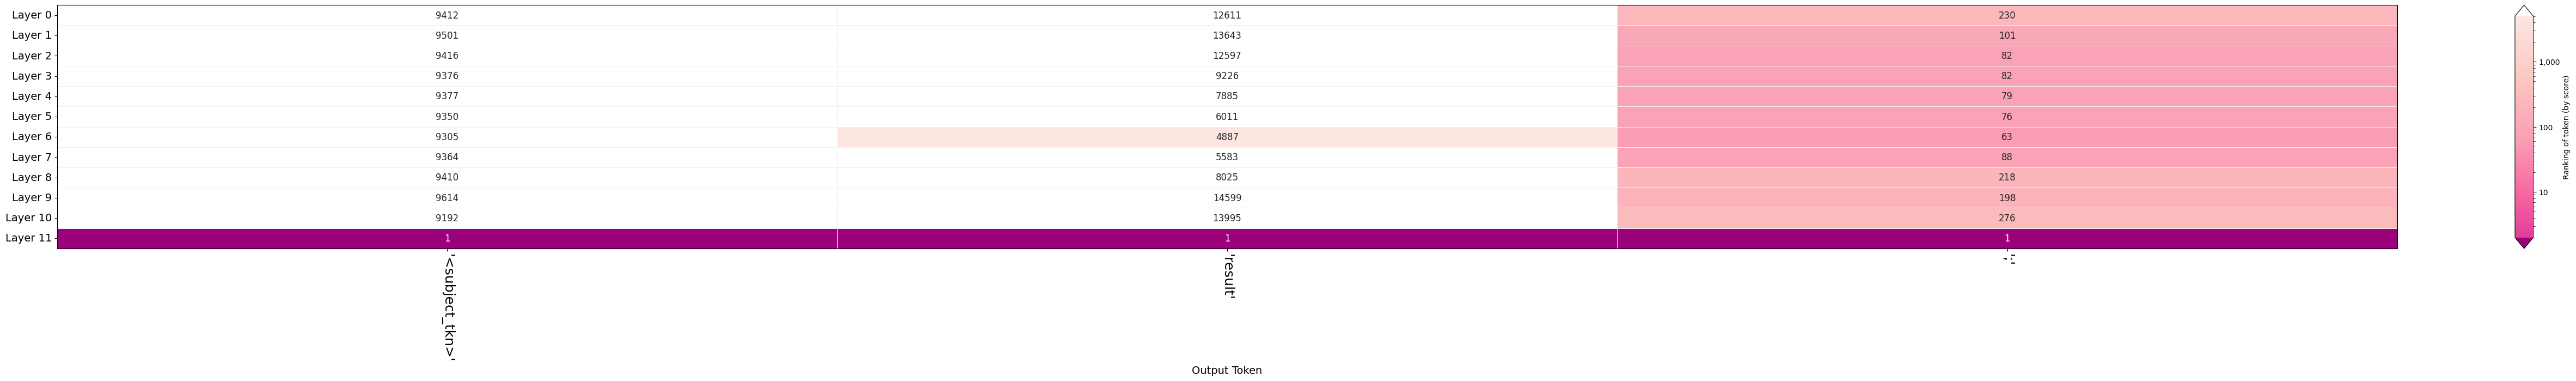

In [34]:
output_1.rankings(save_file_path='rankings_test')

In [35]:
# inputs = ecco_model.tokenizer([text], return_tensors="pt")
# output = ecco_model(inputs)


nmf_1 = output_1.run_nmf(n_components=8) 

nmf_1.explore()

<IPython.core.display.Javascript object>

In [36]:
nmf_2 = output_1.run_nmf(n_components=8, from_layer=0, to_layer=1) 

nmf_2.explore()

<IPython.core.display.Javascript object>

# MLM Explainability

https://github.com/hila-chefer/Transformer-MM-Explainability

PROBABLY NOT

BETTER BUT UNLIKELY TO GET TO THIS POINT

https://github.com/PAIR-code/lit/tree/main

may need these for that step...

!pip install lit-nlp rouge-score shap transformers